In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

In [3]:
import numpy as np

In [4]:
from src.data_processing.io.image import Image

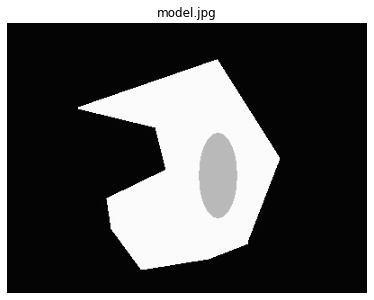

In [5]:
model = Image.from_file("../data/model.jpg")
model.plot()

In [6]:
ni_matrix = np.array([
    [(0, 0.00), (0.01, 0.00), (0.05, 0.00), (0.15, 0.00)],
    [(0, 0.01), (0.01, 0.01), (0.05, 0.01), (0.15, 0.01)],
    [(0, 0.05), (0.01, 0.05), (0.05, 0.05), (0.15, 0.05)],
    [(0, 0.15), (0.01, 0.15), (0.05, 0.15), (0.15, 0.15)]
])

In [7]:
img_matrix = [[model.noise(ni_matrix[i][j][0], mode="gauss").noise(ni_matrix[i][j][1], mode="sp") for i in range(ni_matrix.shape[0])] for j in range(ni_matrix.shape[1])]

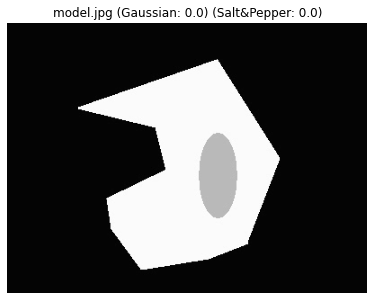

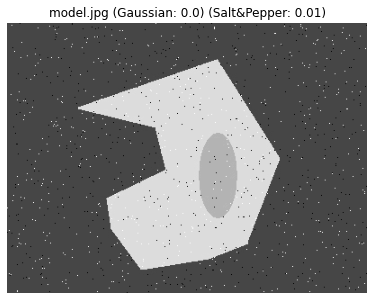

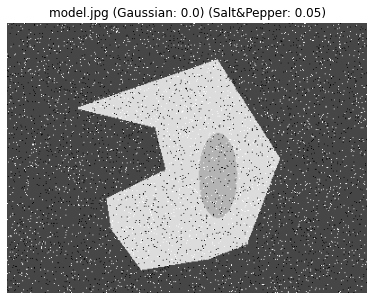

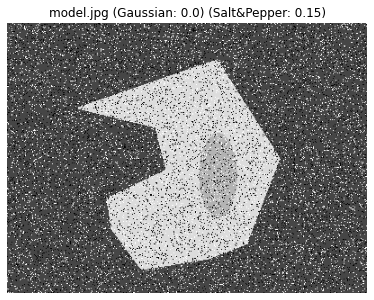

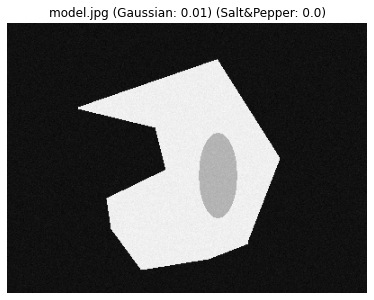

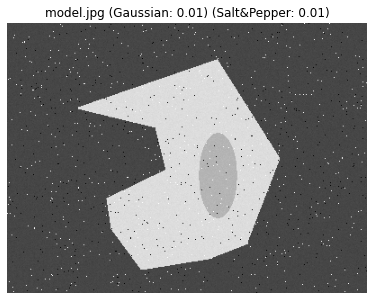

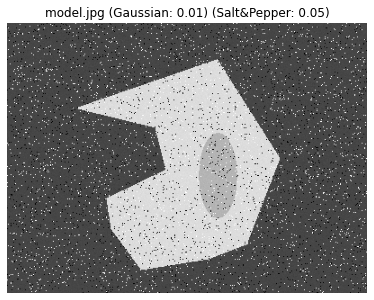

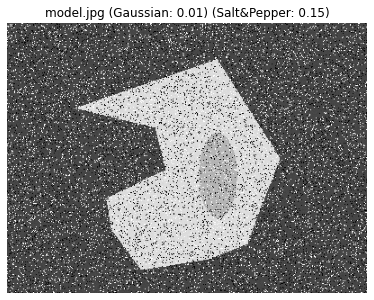

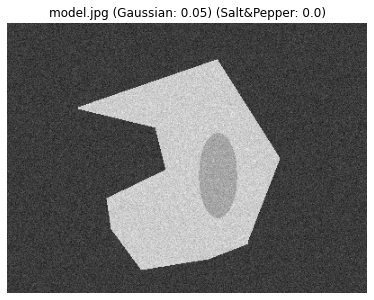

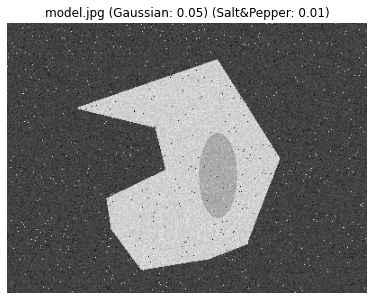

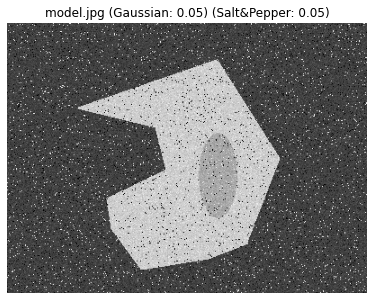

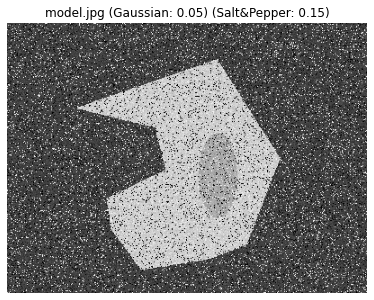

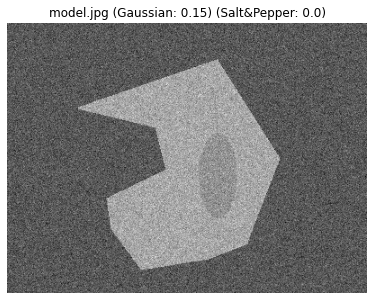

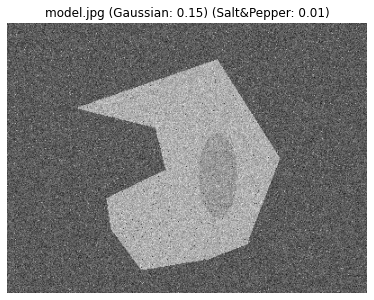

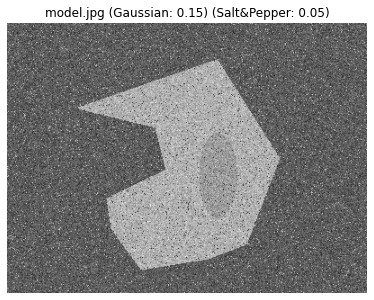

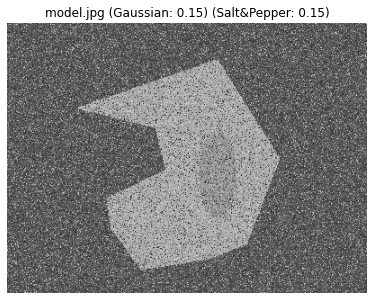

In [8]:
for i in range(4):
    for j in range(4):
        img_matrix[i][j].plot()

In [9]:
from src.data_processing.analysis import dft, get_frequency_spectrum
from src.base.line import Line

In [10]:
from src.data_processing.analysis import histogram

In [11]:
h = histogram(img_matrix[3][3])

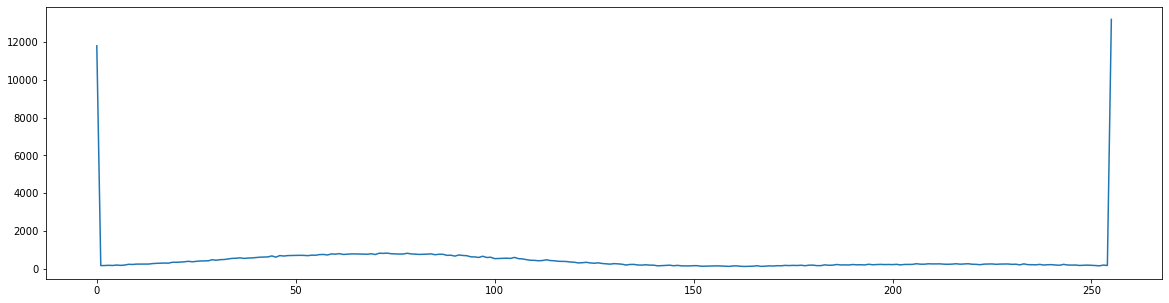

In [12]:
plt.figure(figsize=(20, 5))
h.plot()

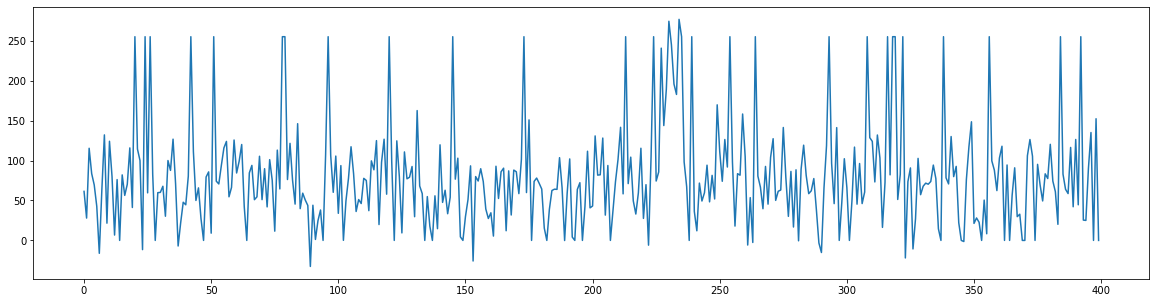

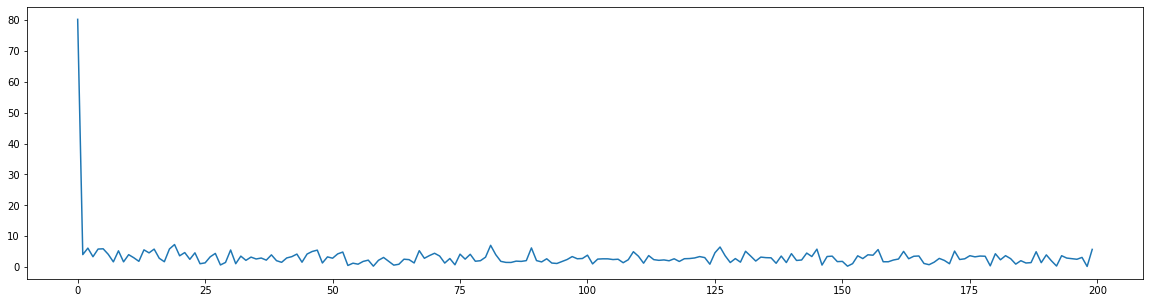

In [13]:
test_line = Line(img_matrix[3][3].img[42])
plt.figure(figsize=(20, 5))
test_line.plot()
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(test_line)).plot()

In [14]:
from src.data_processing.proc.filters import lpf_line, lpf_pic

In [15]:
test_img = img_matrix[3][3]
test_line = Line(test_img.img[42])

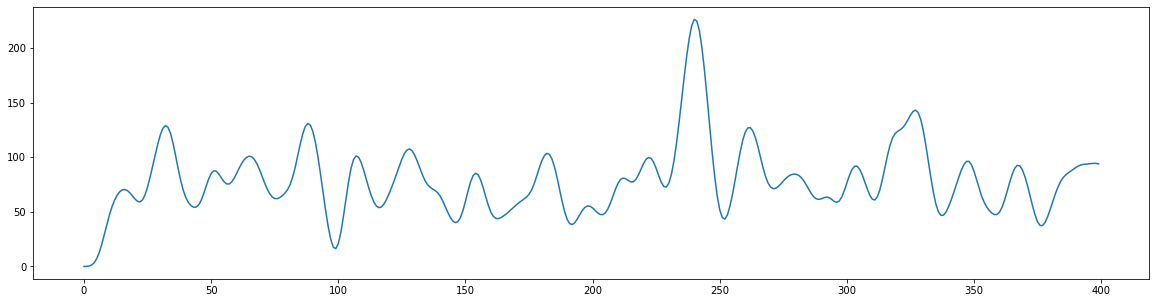

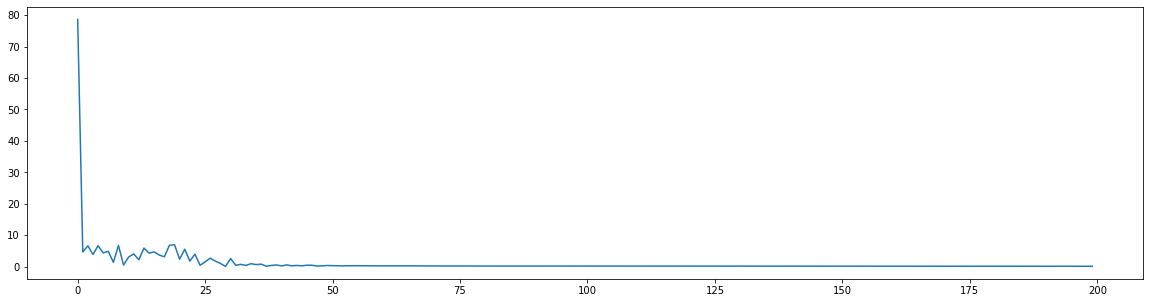

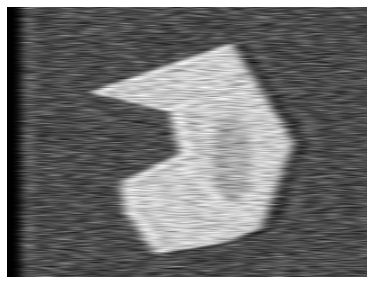

In [16]:
filtered_line = lpf_line(test_line, 25)
plt.figure(figsize=(20, 5))
filtered_line.plot()
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(filtered_line)).plot()
filtered_pic = lpf_pic(test_img, 15)
filtered_pic.plot()

In [17]:
from src.data_processing.proc.filters import median_filter, mean_filter

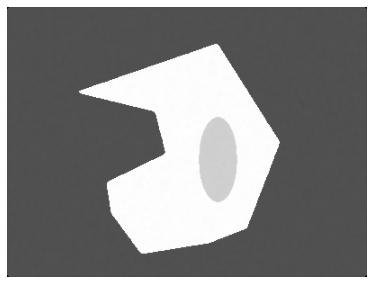

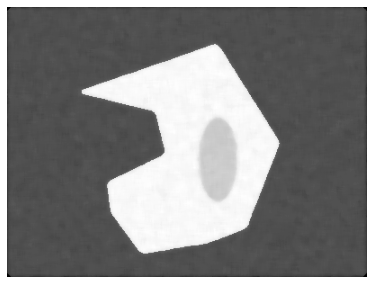

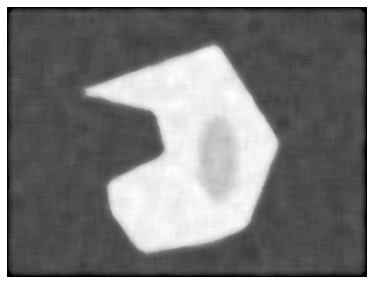

In [28]:
median_filter(img_matrix[1][1], 5).plot()
median_filter(img_matrix[2][2], 9).plot()
median_filter(img_matrix[3][3], 15).plot()